#LEMBRE-SE DE ADICIONAR UMA IMAGEM ATRAVÉS DO MENU LATERAL ESQUERDO PARA UTILIZAR NO ALGORITMO.

## Se quiser, apenas execute o bloco a seguir que uma imagem será baixada.

In [20]:
!wget 'https://fredaugusto.com.br/cachorro.png'

--2024-10-01 23:26:11--  https://fredaugusto.com.br/cachorro.png
Resolving fredaugusto.com.br (fredaugusto.com.br)... 212.1.208.132, 2a02:4780:1:752:0:a08:34d5:2
Connecting to fredaugusto.com.br (fredaugusto.com.br)|212.1.208.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 850710 (831K) [image/png]
Saving to: ‘cachorro.png’

cachorro.png        100%[===================>] 830.77K  5.39MB/s    in 0.2s    

2024-10-01 23:26:12 (5.39 MB/s) - ‘cachorro.png’ saved [850710/850710]




Primeiro, instalamos as bibliotecas essenciais para trabalhar com PyTorch e o Detectron2
- torch: Biblioteca principal para aprendizado profundo (Deep Learning).
- torchvision: Conjunto de ferramentas para trabalhar com visão computacional em PyTorch (manipulação de imagens e modelos pré-treinados).
- torchaudio: Biblioteca para processamento de áudio, opcional aqui, mas incluída para quem deseja expandir as funcionalidades.


In [12]:
!pip install torch torchvision torchaudio

Em seguida, instalamos o Detectron2, um poderoso framework de detecção de objetos e segmentação de instâncias
Desenvolvido pelo Facebook Research, o Detectron2 é amplamente usado para tarefas avançadas de visão computacional.
Ele é instalado diretamente do repositório oficial do GitHub, para garantir a versão mais recente.


In [21]:
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done


Importação de bibliotecas:

    cv2: Utilizada para a manipulação de imagens (OpenCV).
    torch: Framework de aprendizado profundo (PyTorch).
    model_zoo: Para acessar modelos pré-treinados do Detectron2.
    DefaultPredictor: Classe responsável por realizar inferência com o modelo configurado.
    get_cfg: Para obter a configuração padrão do Detectron2.
    Visualizer: Para sobrepor as previsões na imagem original.
    MetadataCatalog: Usado para obter informações de metadados dos conjuntos de dados.
    cv2_imshow: Função específica do Google Colab para exibir imagens (substitui o cv2.imshow).

Configuração do modelo:

    Configuração básica do Detectron2 com base em um modelo pré-treinado no dataset COCO.
    Define o limiar de confiança para as predições em 50%.
    Especifica o caminho dos pesos pré-treinados e o dispositivo de processamento (GPU, se disponível).

Inferência na imagem:

    Carrega a imagem usando o OpenCV (cv2.imread).
    Executa a inferência usando o preditor configurado para detectar e segmentar objetos na imagem.

Visualização dos resultados:

    Utiliza a classe Visualizer para sobrepor as previsões (caixas delimitadoras e máscaras de segmentação) na imagem.
    Exibe a imagem com as previsões no Google Colab usando a função cv2_imshow.

Salvamento dos resultados:

    Após visualizar a imagem processada, o script salva a imagem com as segmentações sobrepostas em um arquivo de saída.

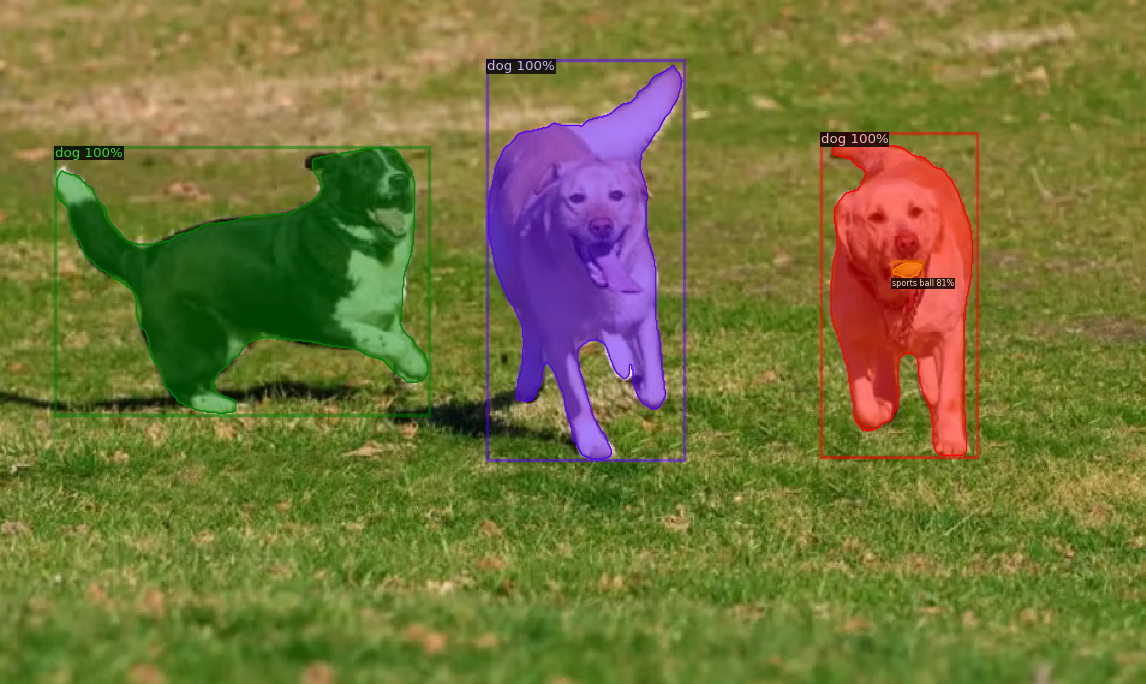

True

In [23]:
import cv2
import torch
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow  # Função para exibir imagens no Colab

# Configuração do modelo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Configurar limiar de confiança
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Usar GPU se disponível

# Inicializa o preditor
predictor = DefaultPredictor(cfg)

# Carregar a imagem
image_path = "cachorro.png"
image = cv2.imread(image_path)

# Fazer a previsão na imagem
outputs = predictor(image)

# Visualizar os resultados
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Mostrar a imagem com as segmentações
cv2_imshow(out.get_image()[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salvar a imagem com a segmentação
output_image_path = image_path + "_segmentacao.jpg"
cv2.imwrite(output_image_path, out.get_image()[:, :, ::-1])
